# Car Price

## Description
- Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
- Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
- Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
- Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
- Engine Type: Understand the engine specifications, shedding light on performance and efficiency.
- Transmission: Determine the transmission type, whether automatic, manual, or another variant.
- Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
- Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
- Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
- Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.

## EDA

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# load csv and read the first 5 rows
df = pd.read_csv('used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [3]:
# Rename milage column to mileage
df.rename(columns = {'milage': 'mileage'}, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   mileage       4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


### Data Cleaning 

In [5]:
# Change Dtypes 
# replace mi. and commas from mileage
df['mileage'] = df['mileage'].str.replace(' mi.', '', regex=False)
df['mileage'] = df['mileage'].str.replace(',', '', regex=False).astype(int)

# replace $ and commas from price
df['price'] = df['price'].str.replace(r'\D', '', regex=True).astype(int)

In [6]:
df.select_dtypes(include=int).describe()

,model_year,mileage,price
count,4009.000000,4009.000000,4.009000e+03
mean,2015.515590,64717.551010,4.455319e+04
std,6.104816,52296.599459,7.871064e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23044.000000,1.720000e+04
50%,2017.000000,52775.000000,3.100000e+04
75%,2020.000000,94100.000000,4.999000e+04
max,2024.000000,405000.000000,2.954083e+06


In [7]:
df.select_dtypes(include=object).describe()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,4009,4009,3839,4009,4009,4009,4009,3896,3413
unique,57,1898,7,1146,62,319,156,2,1
top,Ford,M3 Base,Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes
freq,386,30,3309,52,1037,905,2025,2910,3413


In [8]:
# Chceck for missing values
df.isnull().sum()

brand             0
model             0
model_year        0
mileage           0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [9]:
# Check for dupliactes
df.duplicated().sum()

np.int64(0)

In [10]:
# Check clean_title column
df['clean_title'].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

In [11]:
# Drop clean_title column
df.drop('clean_title', axis=1, inplace=True)

In [12]:
# Check fuel type column
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [13]:
# Check where we have NaN values in fuel type
df[df['fuel_type'].isnull()]

,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,price
9,Tesla,Model X Long Range Plus,2020,34000,NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,69950
44,Lucid,Air Grand Touring,2022,3552,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,119999
68,Lucid,Air Grand Touring,2022,4900,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,99000
92,Rivian,R1S Adventure Package,2023,2800,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Green,None reported,92000
122,Rivian,R1S Adventure Package,2023,2500,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Green,White,None reported,94000
...,...,...,...,...,...,...,...,...,...,...,...
3908,Tesla,Model Y Long Range,2021,49252,NaN,Electric,1-Speed Automatic,Deep Blue Metallic,Black,None reported,37999
3913,Tesla,Model S 100D,2018,65000,NaN,518.0HP Electric Motor Electric Fuel System,A/T,Blue,Black,None reported,41000
3932,Tesla,Model X Performance,2020,25535,NaN,778.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,68969
3961,Tesla,Model 3 Long Range,2021,23749,NaN,Electric,1-Speed Automatic,White,Black,None reported,35999


In [14]:
# Check fuel type for tesla brand
tesla_fuel_types = df[df['brand'] == 'Tesla']['fuel_type']
tesla_fuel_types.unique()

array([nan], dtype=object)

In [15]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [16]:
# Replace NaN values in the 'fuel_type' column with 'Electric'
df['fuel_type'] = df['fuel_type'].fillna('Electric')

In [17]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
Electric           170
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [18]:
# Replace '-' and 'not supported' with 'Unknown' in fuel type column
df['fuel_type'] = df['fuel_type'].replace('–', 'Unknown')
df['fuel_type'] = df['fuel_type'].replace('not supported', 'Unknown')

In [19]:
# Replace accident into 0 and 1
df['accident'] = df['accident'].replace('None reported', '0')
df['accident'] = df['accident'].replace('At least 1 accident or damage reported', '1')

# Replace missing values (NaN) in the 'accident' column with 'missing'
df['accident'] = df['accident'].fillna('Unknown')

In [20]:
df['brand'].value_counts()

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Subaru            64
Acura             64
Mazda             64
Honda             63
INFINITI          59
Volkswagen        59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Genesis           20
Mitsubishi        20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
Scion              6
McLaren            6
Saturn             5
FIAT               5
Lotus              4
Lucid  

In [21]:
# Change all brand names to upper
df['brand'] = df['brand'].str.upper()

In [22]:
df['transmission'].value_counts()

transmission
A/T                                  1037
8-Speed A/T                           406
Transmission w/Dual Shift Mode        398
6-Speed A/T                           362
6-Speed M/T                           248
                                     ... 
10-Speed Automatic with Overdrive       1
9-Speed Automatic with Auto-Shift       1
SCHEDULED FOR OR IN PRODUCTION          1
6 Speed Mt                              1
8-Speed Manual                          1
Name: count, Length: 62, dtype: int64

In [23]:
df['transmission'] = df['transmission'].replace('SCHEDULED FOR OR IN PRODUCTION', '8-Speed A/T')
df['transmission'] = df['transmission'].replace('2', 'Automatic')
df['transmission'] = df['transmission'].replace('F', 'Automatic')

In [24]:
# Change transmission into Automatic, Manual and Other
def standardize_transmission(transmission):
    # Remove leading/trailing spaces and convert to lowercase
    transmission = transmission.strip().lower()
    
    # Check for automatic-related terms (including variations like CVT, DCT, etc.)
    if any(x in transmission for x in ['a/t', 'automatic', 'cv', 'dct', 'at', 'auto']):
        return 'Automatic'
    
    # Check for manual-related terms (including "m/t", "manual", etc.)
    elif any(x in transmission for x in ['m/t', 'manual', 'mt']):
        return 'Manual'
    
    else:
        return 'Other'


# Apply the standardization function to the transmission column
df['transmission'] = df['transmission'].apply(standardize_transmission)

In [25]:
# Check the result
print(df['transmission'].value_counts())

transmission
Automatic    3220
Other         416
Manual        373
Name: count, dtype: int64


In [26]:
df.nunique().sort_values(ascending=False)

mileage         2818
model           1898
price           1569
engine          1146
ext_col          319
int_col          156
brand             57
model_year        34
fuel_type          7
transmission       3
accident           3
dtype: int64

In [27]:
# Drop model column
df.drop('model', axis=1, inplace=True)

In [28]:
# Check engine column
df['engine'].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
                                                         ..
305.0HP 6.8L 10 Cylinder Engine Gasoline Fuel             1
562.0HP 5.2L 10 Cylinder Engine Gasoline Fuel             1
245.0HP 5.9L Straight 6 Cylinder Engine Diesel Fuel       1
303.0HP 3.7L V6 Cylinder Engine Gasoline Fuel             1
160.0HP 1.4L 4 Cylinder Engine Gasoline Fuel              1
Name: count, Length: 1146, dtype: int64

In [29]:
# Create a new column named horsepower from engine column
df['horsepower'] = df['engine'].str.extract(r'(\d{3})\.\d{1}HP').astype(float)

In [30]:
# Create a new column named displacement_liters from engine column
df['displacement_liters'] = df['engine'].str.extract(r'(\d+\.\d+)L').astype(float)

In [31]:
# Create a new column named cylinder_config from engine column
df['cylinder_config'] = df['engine'].str.extract(r'\b([V]?\d)\s+Cylinder', expand=False)

In [32]:
# Drop engine column
df.drop('engine', axis=1, inplace=True)

### Some Graphs

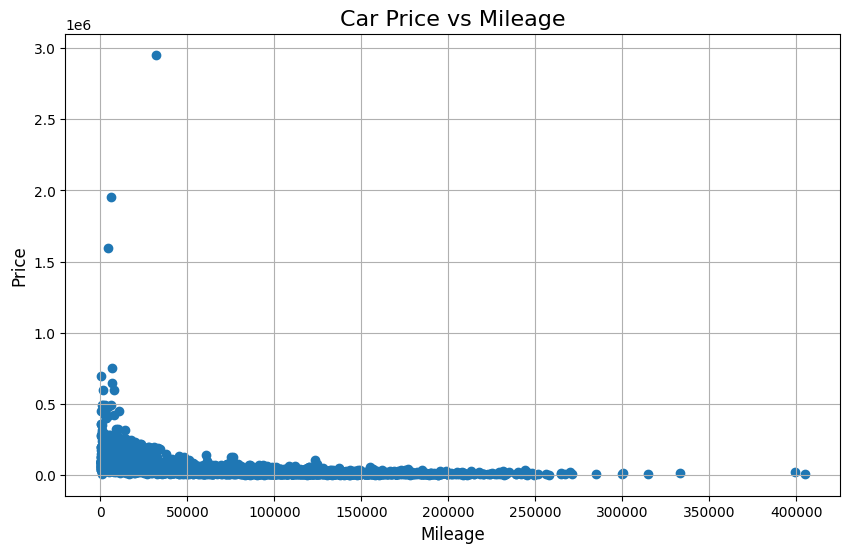

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'])
plt.title('Car Price vs Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)

plt.show()

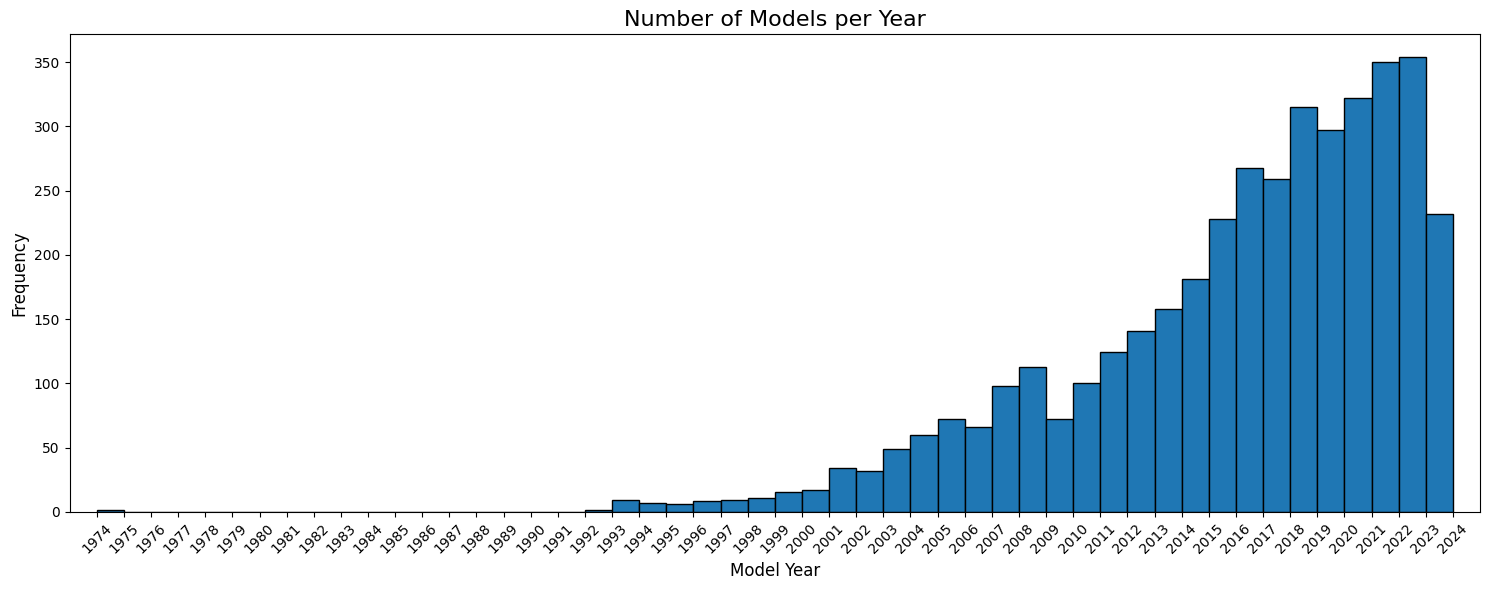

In [34]:
plt.figure(figsize=(15,6))

df['model_year'].hist(bins=range(df['model_year'].min(), df['model_year'].max() + 1), edgecolor='black')

plt.grid(False)

plt.title('Number of Models per Year', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust x-axis limits to reduce extra space on the left and right
plt.xlim(df['model_year'].min() - 1, df['model_year'].max() + 1)  # Shrink left and right margins

# Set x-ticks to show every year
plt.xticks(range(df['model_year'].min(), df['model_year'].max() + 1), rotation=45)  

# Adjust layout to avoid overlap of x-axis labels
plt.tight_layout()

plt.show()

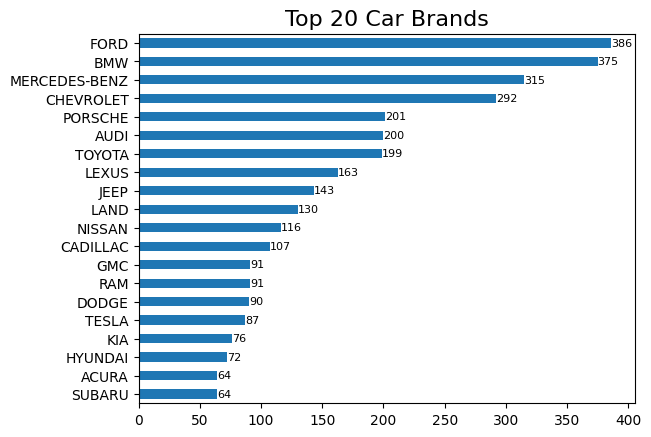

In [35]:
top_20_brands = df['brand'].value_counts().head(20)

# Sort the values to ensure they are from higher to lower
top_20_brands = top_20_brands.sort_values(ascending=True)


ax = top_20_brands.plot(kind='barh')
plt.title('Top 20 Car Brands', fontsize=16)  
plt.ylabel('', fontsize=12)            


# Add labels on the bars (counts)
for index, value in enumerate(top_20_brands):
    ax.text(value, index, str(value), va='center', fontsize=8, color='black')

plt.show()

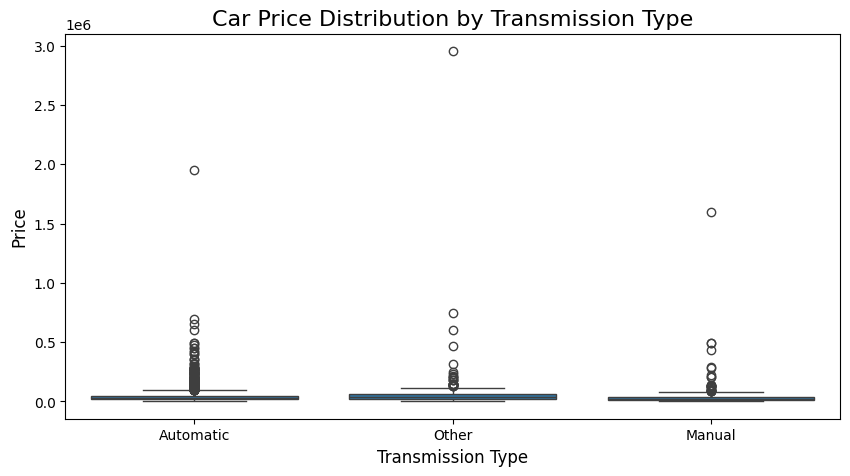

In [36]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df, x='transmission',y='price')

plt.title('Car Price Distribution by Transmission Type',fontsize=16)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

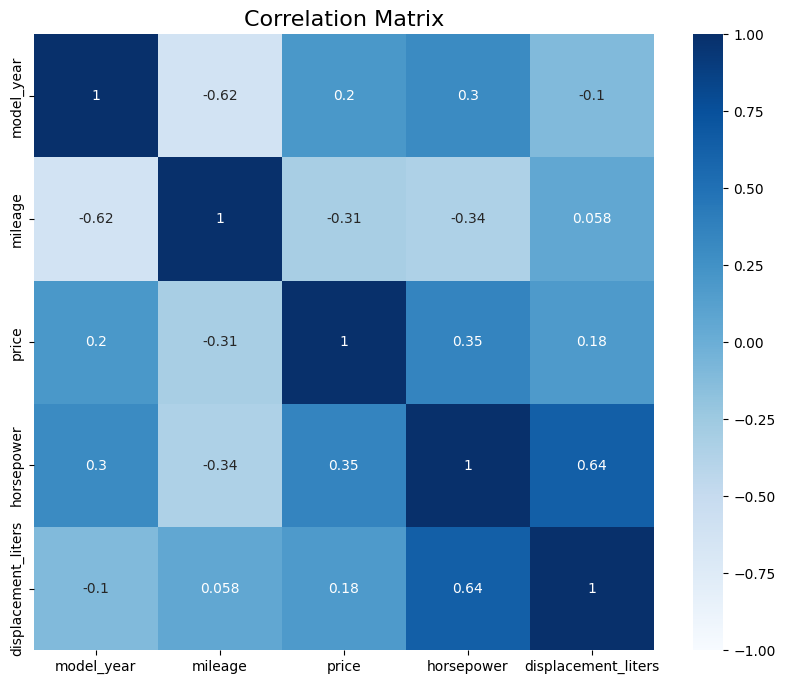

In [37]:
correlation_matrix = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1)
plt.title('Correlation Matrix', fontsize=16)

plt.show()

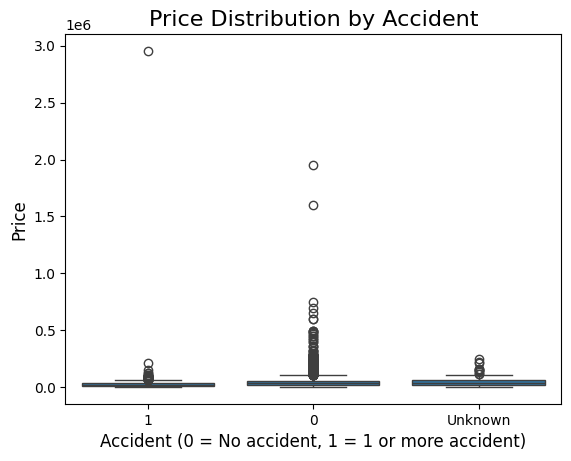

In [38]:
sns.boxplot(data=df,x="accident",y="price")
plt.title("Price Distribution by Accident", fontsize=16)
plt.xlabel("Accident (0 = No accident, 1 = 1 or more accident)", fontsize=12)
plt.ylabel("Price", fontsize=12)

plt.show()

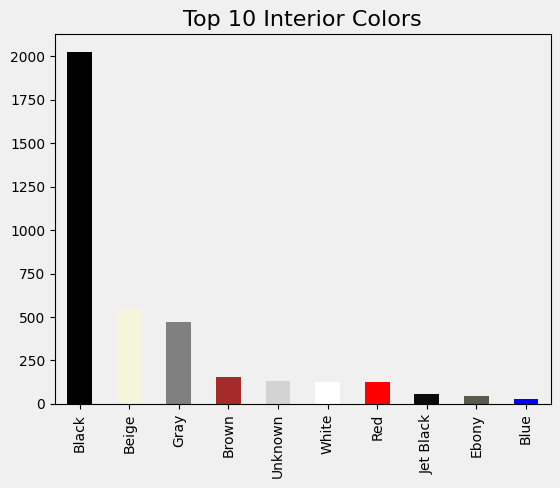

In [39]:
fig, ax = plt.subplots(facecolor='#f0f0f0')  # light gray
ax.set_facecolor('#f0f0f0')

top_10_int_colors = df['int_col'].replace('–', 'Unknown').value_counts().head(10)

colors = ['black', 'beige', 'gray', 'brown', '#D3D3D3', 'white', 'red', '#0A0A0A', '#555D50', 'blue']
top_10_int_colors.plot(kind='bar', color=colors)

plt.title('Top 10 Interior Colors', fontsize=16)
plt.xlabel('')

plt.show()

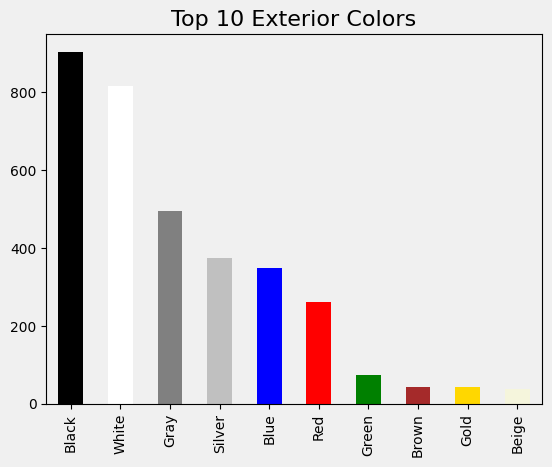

In [40]:
fig, ax = plt.subplots(facecolor='#f0f0f0')  # light gray
ax.set_facecolor('#f0f0f0')

top_10_ext_colors = df['ext_col'].value_counts().head(10)

colors = ['black', 'white', 'gray', 'silver', 'blue', 'red', 'green', 'brown', 'gold', 'beige']
top_10_ext_colors.plot(kind='bar', color=colors)

plt.title('Top 10 Exterior Colors', fontsize=16)
plt.xlabel('')

plt.show()

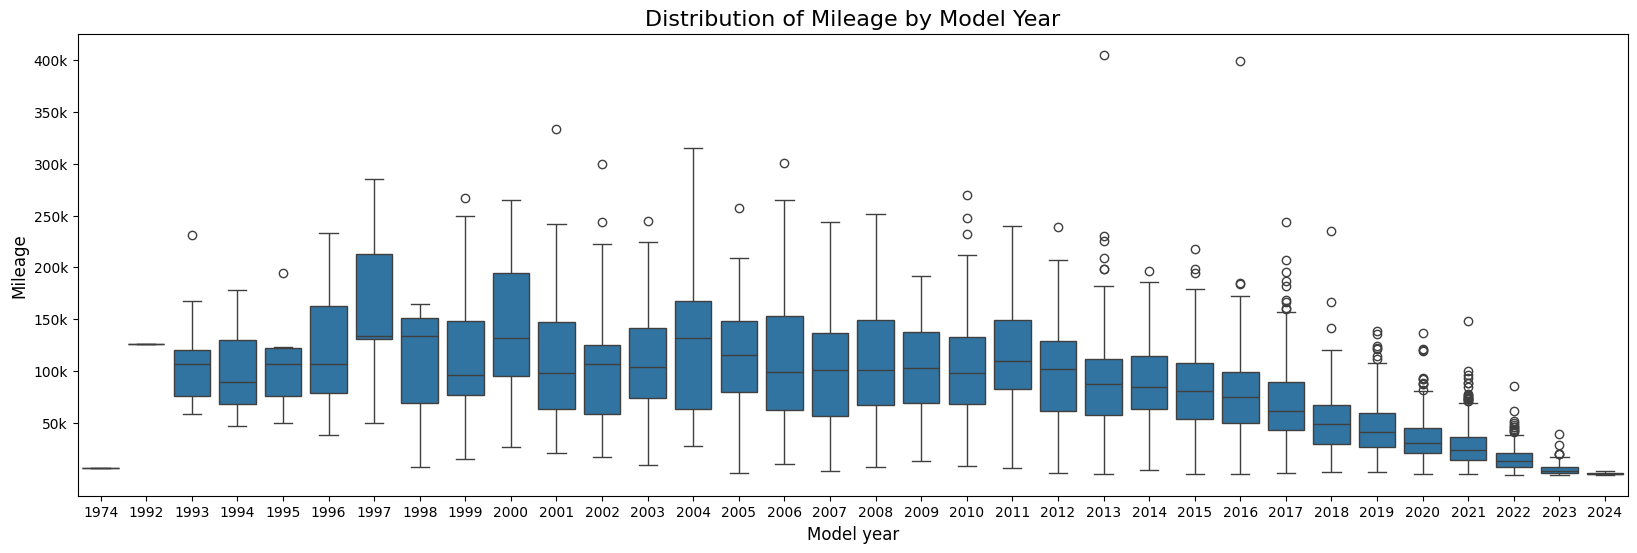

In [41]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=df, x='model_year', y='mileage')


# Manually set yticks
ticks = [50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]
labels = [f'{int(t/1000)}k' for t in ticks]
plt.yticks(ticks, labels)

plt.title('Distribution of Mileage by Model Year', fontsize=16)
plt.xlabel('Model year', fontsize=12)
plt.ylabel('Mileage', fontsize=12)

plt.show()

## Model Fitting 

In [42]:
# Remove outliers
def remove_outliers(column, df):
    Q1 = df[column].quantile(0.25) # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75) # Third quartile (75th percentile)
    IQR = Q3 - Q1                  # Interquartile range (spread of the middle 50%)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[column] >= lower_whisker) & (df[column] <= upper_whisker)]
    after = df.shape[0]
    print(f"{column}: Removed {before - after} outliers")
    return df

numeric_columns= ['mileage', 'price']
for col in numeric_columns:
    df = remove_outliers(col, df)

df.reset_index(inplace=True, drop=True)

mileage: Removed 69 outliers
price: Removed 251 outliers


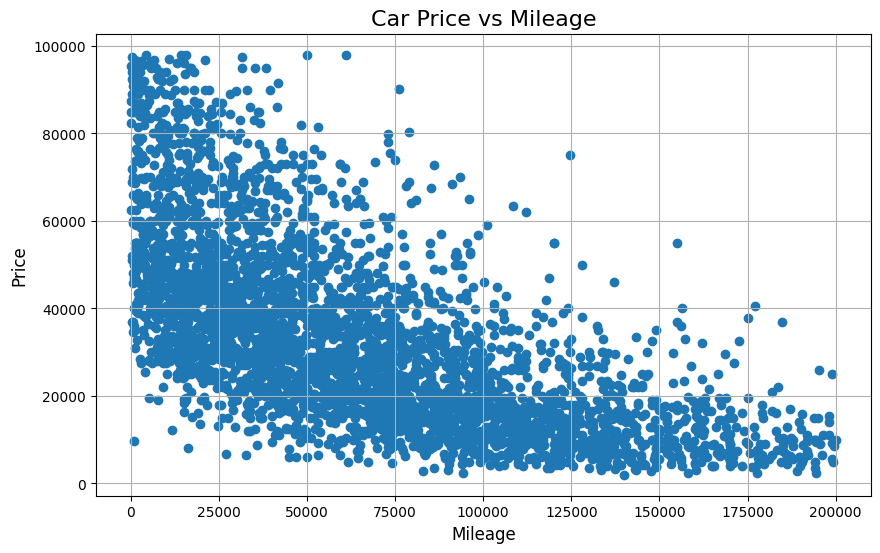

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'])
plt.title('Car Price vs Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)

plt.show()

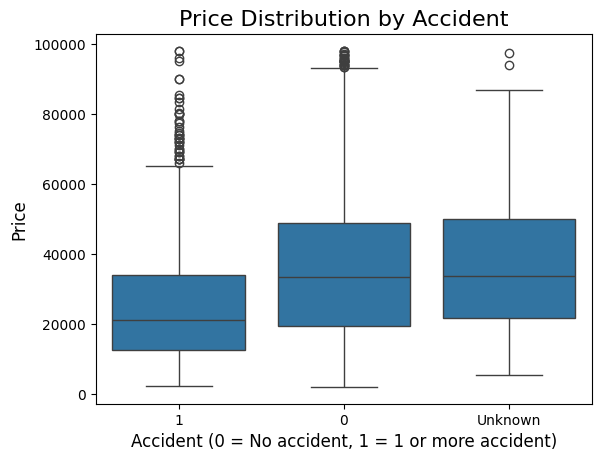

In [44]:
sns.boxplot(data=df,x="accident",y="price")
plt.title("Price Distribution by Accident", fontsize=16)
plt.xlabel("Accident (0 = No accident, 1 = 1 or more accident)", fontsize=12)
plt.ylabel("Price", fontsize=12)

plt.show()

### Linear Regression

In [45]:
X = df.drop('price', axis=1)
y = df['price']


# Separate features into categorical and numeric
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numeric data
    ('scaler', StandardScaler())
])


# Combine pipelines with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])


# Full pipeline with regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('LinearRegression', LinearRegression())
])


# Train the model
model.fit(X_train, y_train)


# Predict and Evaluate
y_pred = model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 8350.66
MSE: 126832539.48
RMSE: 11262.00
R² Score: 0.72


### Lasso

In [46]:
X = df.drop('price', axis=1)
y = df['price']


# Separate features into categorical and numeric
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numeric data
    ('scaler', StandardScaler())
])


# Combine pipelines with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])


# Full pipeline with Lasso regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Lasso', Lasso(alpha=1.0, random_state=42, max_iter=5000)) 
])


# Train the model
model.fit(X_train, y_train)


# Predict and Evaluate
y_pred = model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 8245.14
MSE: 125985702.32
RMSE: 11224.34
R² Score: 0.72


### RandomForest

In [47]:
X = df.drop('price', axis=1)
y = df['price']


# Separate features into categorical and numeric
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numeric data
    ('scaler', StandardScaler())
])


# Combine pipelines with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])


# Full pipeline with regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])


# Train the model
model.fit(X_train, y_train)


# Predict and Evaluate
y_pred = model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 5998.16
MSE: 78563343.13
RMSE: 8863.60
R² Score: 0.83


### RandomForest with Hyperparameter Tuning

In [51]:
X = df.drop('price', axis=1)
y = df['price']


# Separate features into categorical and numeric
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numeric data
    ('scaler', StandardScaler())
])


# Combine pipelines with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])


# Full pipeline with regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])


param_distributions = {
    'rf__n_estimators': [100, 200, 300, 500],       
    'rf__max_depth': [None, 10, 20, 30, 40],         
    'rf__min_samples_split': [2, 3, 4, 5],             
    'rf__min_samples_leaf': [1, 2, 3, 4],               
    'rf__max_features': ['sqrt', 'log2'],             
    'rf__bootstrap': [True, False],                  
}


random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=50,  
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)


# Train the model
random_search.fit(X_train, y_train)


# Print best parameters
print('Best Parameters:', random_search.best_params_)


# Predict with the best model 
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'rf__n_estimators': 500, 'rf__min_samples_split': 3, 'rf__min_samples_leaf': 1, 'rf__max_features': 'sqrt', 'rf__max_depth': 40, 'rf__bootstrap': False}
MAE: 6669.54
MSE: 91325922.38
RMSE: 9556.46
R² Score: 0.80


### XGBoost

In [49]:
X = df.drop('price', axis=1)
y = df['price']


# Separate features into categorical and numeric
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numeric data
    ('scaler', StandardScaler())
])


# Combine pipelines with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])


# Full pipeline with regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBRegressor())
])


# Train the model
model.fit(X_train, y_train)


# Predict and Evaluate
y_pred = model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 5873.59
MSE: 73337984.00
RMSE: 8563.76
R² Score: 0.84


### XGBoost with Hyperparameter Tuning

In [50]:
X = df.drop('price', axis=1)
y = df['price']


# Separate features into categorical and numeric
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numeric data
    ('scaler', StandardScaler())
])


# Combine pipelines with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])


# Full pipeline with regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBRegressor())
])


# parameters for XGBoost
param_distributions = {
    'xgb__n_estimators': [100, 200, 300],           
    'xgb__max_depth': [3, 6, 10],                   
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__gamma': [0, 0.1, 0.3],
    'xgb__reg_alpha': [0, 0.01, 0.1],
    'xgb__reg_lambda': [1, 1.5, 2]
}


# RandomizedSearchCV for Hyperparameter Tuning
random_search = RandomizedSearchCV(
    model, 
    param_distributions=param_distributions, 
    n_iter=10,                      # Number of iterations for RandomizedSearch
    cv=3,                           # 3-fold cross-validation
    verbose=2,                      # Increase verbosity to track progress
    n_jobs=-1,                      # Use all available cores for parallel processing
    random_state=42
)


# Train Model using RandomizedSearchCV
random_search.fit(X_train, y_train)


# Best Hyperparameters
print("Best Parameters: ", random_search.best_params_)


# Predict with the best model 
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters:  {'xgb__subsample': 0.7, 'xgb__reg_lambda': 1.5, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 300, 'xgb__min_child_weight': 1, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.3, 'xgb__colsample_bytree': 0.8}
MAE: 5435.93
MSE: 61767264.00
RMSE: 7859.22
R² Score: 0.86
